# Unveiling Insights: A Journey Through Online Retail Transactions

## **Introduction**

Every data project begins with a question. It sounds simple, even obvious, yet many aspiring data professionals fall into the trap of diving headfirst into the data—cleaning, filtering, and visualizing—without first defining the problem they want to solve. A true professional, however, approaches data with curiosity and structure, always starting with a well-defined question.

This project is designed not just as an analysis but as a guided journey. Whether you're an HR manager evaluating my analytical skills or an aspiring data scientist looking to learn alongside me, this project aims to be both informative and engaging.

## **About the Dataset**

The dataset we will explore consists of **over 500,000 transactions** from an online retail store, spanning from **December 2010 to December 2011**. It provides detailed information about customer purchases, including:

- **Invoice numbers** (to track unique transactions)
- **Stock codes and product descriptions** (to identify items sold)
- **Quantities and unit prices** (to calculate revenue and sales trends)
- **Timestamps** (to analyze seasonal patterns and shopping behaviors)
- **Customer IDs** (to explore customer retention and segmentation)
- **Geographical data** (to uncover purchasing trends across different countries)

This dataset presents a fantastic opportunity to **extract meaningful insights, visualize trends, and tell compelling data-driven stories**. Through this project, we will answer key business questions such as:

- What are the most popular products, and how do their sales fluctuate over time?
- Which countries contribute the most to total revenue?
- Are there seasonal trends that influence customer spending?
- Can we identify loyal customers and their purchasing behaviors?

Through **descriptive visualizations and storytelling**, this analysis will go beyond mere numbers. Instead, it will uncover the hidden patterns behind online retail transactions, making data both accessible and insightful.

Let’s dive in and explore the data together!



In [1]:
!source data_analysis_env/bin/activate
%pip install -r requirements.txt

You should consider upgrading via the '/Users/thebekhruz/Desktop/Projects/Data_Analysis_Online_Retail_Transactions/data_analysis_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/online_retail.csv')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


## **Data Cleaning and Preparation**

The first step in our journey is to clean the data and remove outliers. Above, we examined the general structure of the dataset using `df.info()`, and we observed missing values in the `CustomerID` and `Description` columns. 

To address these issues:
- **CustomerID:** Missing values likely indicate guest checkouts. We will assign a placeholder flag to these missing values to distinguish them from registered users.
- **Description:** We will fill missing values using existing descriptions based on `StockCode`. Any objects with no description will be removed as their impact on the dataset is negligible.

### **Further Examination of the Data**

To optimize our dataset for analysis, we will:
- **Remove the `index` column** as it is not necessary.
- **Utilize `InvoiceDate`** for examining sales trends over time.
- **Convert columns to the correct formats:**
  - `InvoiceDate`: **object** → **datetime64** (Allows time-series analysis)
  - `CustomerID`: **float64** → **Int64** (IDs should be integers but allow NaN)
  - `InvoiceNo`: **object** → **category** (Optimizes memory for repeated values)
  - `StockCode`: **object** → **category** (Optimizes memory for repeated values)

With our data cleaned and formatted correctly, we can now move on to uncovering meaningful insights through descriptive analysis and visualization.



In [4]:
# ! TODO: Add documentation in jupyter notebook about .transform and forward and backward fill
# Handle missing CustomerID (guest checkouts)
df["CustomerID"] = df["CustomerID"].fillna(-1)
df["CustomerID"] = df["CustomerID"].astype("Int64")

# Fill missing Description using StockCode mode
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())
df['Description'] = df['Description'].astype("string")

df.dropna(subset=["Description"], inplace=True)

# Remove unnecessary index column
if "index" in df.columns:
    df.drop(columns=["index"], inplace=True)

# Convert data types
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Ensure datetime format
df["InvoiceNo"] = df["InvoiceNo"].astype("category")  # Optimize memory
df["StockCode"] = df["StockCode"].astype("category")

# Display cleaned DataFrame info
df.info()

# Note how we descreased the memory usage from 37.2+ MB to 32.9+ MB

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_26135/3663710544.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())


<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  category      
 1   StockCode    541797 non-null  category      
 2   Description  541797 non-null  string        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   541797 non-null  Int64         
 7   Country      541797 non-null  object        
dtypes: Int64(1), category(2), datetime64[ns](1), float64(1), int64(1), object(1), string(1)
memory usage: 32.9+ MB


In [5]:
# # Identify the most popular products based on the total quantity sold
# popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
# print(popular_products)

# # Plot the sales trends of these popular products over time
# popular_product_names = popular_products.index.tolist()
# popular_product_data = df[df['Description'].isin(popular_product_names)]

# # Convert InvoiceDate to datetime if not already done
# popular_product_data['InvoiceDate'] = pd.to_datetime(popular_product_data['InvoiceDate'])

# # Group by date and product to get the daily sales
# daily_sales = popular_product_data.groupby([popular_product_data['InvoiceDate'].dt.date, 'Description'])['Quantity'].sum().unstack().fillna(0)

# # Plotting
# plt.figure(figsize=(14, 7))
# for product in popular_product_names:
#     plt.plot(daily_sales.index, daily_sales[product], label=product)

# plt.title('Sales Trends of Most Popular Products Over Time')
# plt.xlabel('Date')
# plt.ylabel('Quantity Sold')
# plt.legend()
# plt.show()

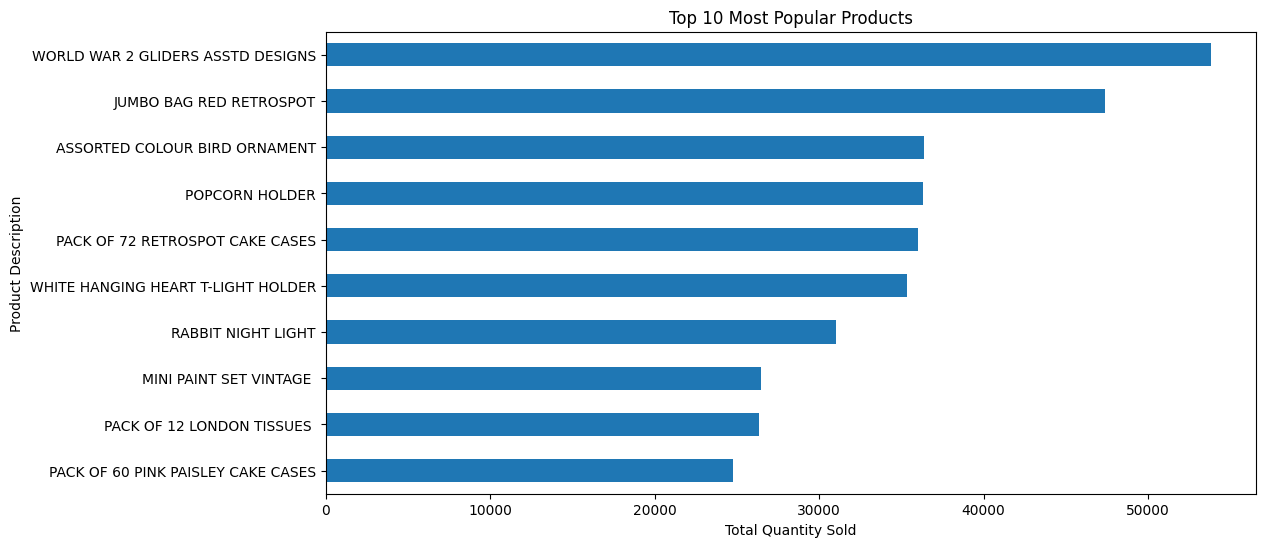

<Figure size 1400x700 with 0 Axes>

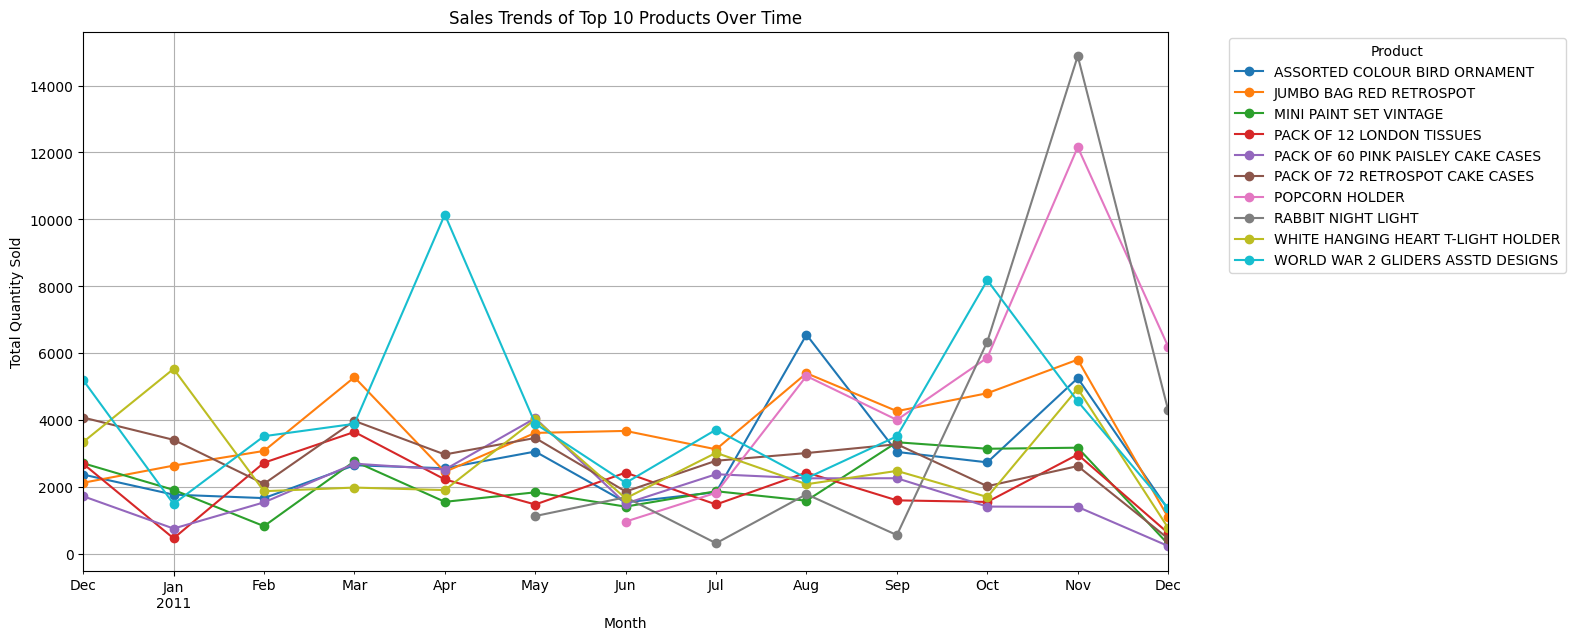

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify top-selling products by total quantity sold
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot top 10 products
plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind='barh')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Most Popular Products")
plt.show()

# Analyze sales fluctuations over time for top products
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure datetime format
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # Extract month for trend analysis

# Filter sales data for top products
top_product_sales = df[df['Description'].isin(top_products.index)]

# Aggregate monthly sales for top products
sales_trend = top_product_sales.groupby(['Month', 'Description'])['Quantity'].sum().unstack()

# Plot sales trends over time
plt.figure(figsize=(14, 7))
sales_trend.plot(marker='o', figsize=(14, 7))
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Trends of Top 10 Products Over Time")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()
